# Pedestrian Incident Analysis

In [2]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
import pickle

sns.set_palette("deep", desat=0.6)
sns.set_context(rc={"figure.figsize": (8,4)})

In [3]:
dfPed = pd.read_csv('Data/pedestrian.csv')

In [4]:
dfPed.head()

,Unnamed: 0,DATE,TIME,BOROUGH,ZIP.CODE,LATITUDE,LONGITUDE,LOCATION,ON.STREET.NAME,CROSS.STREET.NAME,...,CONTRIBUTING.FACTOR.VEHICLE.2,CONTRIBUTING.FACTOR.VEHICLE.3,CONTRIBUTING.FACTOR.VEHICLE.4,CONTRIBUTING.FACTOR.VEHICLE.5,UNIQUE.KEY,VEHICLE.TYPE.CODE.1,VEHICLE.TYPE.CODE.2,VEHICLE.TYPE.CODE.3,VEHICLE.TYPE.CODE.4,VEHICLE.TYPE.CODE.5
0,16,02/27/2018,10:13,BROOKLYN,11226.0,40.642690,-73.95764,"(40.64269, -73.95764)",CLARENDON ROAD,FLATBUSH AVENUE,...,NaN,NaN,NaN,NaN,3853488,NaN,NaN,NaN,NaN,NaN
1,42,02/27/2018,10:56,NaN,NaN,40.847500,-73.86696,"(40.8475, -73.86696)",RHINELANDER AVENUE,WHITE PLAINS ROAD,...,NaN,NaN,NaN,NaN,3853519,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
2,50,02/27/2018,11:08,QUEENS,11432.0,40.705200,-73.79926,"(40.7052, -73.79926)",NaN,NaN,...,NaN,NaN,NaN,NaN,3854232,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN
3,57,02/27/2018,11:30,BROOKLYN,11201.0,40.695232,-73.98326,"(40.695232, -73.98326)",NaN,NaN,...,Unspecified,NaN,NaN,NaN,3853149,SPORT UTILITY / STATION WAGON,BICYCLE,NaN,NaN,NaN
4,71,02/27/2018,12:03,BROOKLYN,11236.0,40.645027,-73.91998,"(40.645027, -73.91998)",CLARENDON ROAD,RALPH AVENUE,...,Unspecified,NaN,NaN,NaN,3853819,PASSENGER VEHICLE,BICYCLE,NaN,NaN,NaN


In [4]:
dfPed.columns

Index(['Unnamed: 0', 'DATE', 'TIME', 'BOROUGH', 'ZIP.CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON.STREET.NAME', 'CROSS.STREET.NAME',
       'OFF.STREET.NAME', 'NUMBER.OF.PERSONS.INJURED',
       'NUMBER.OF.PERSONS.KILLED', 'NUMBER.OF.PEDESTRIANS.INJURED',
       'NUMBER.OF.PEDESTRIANS.KILLED', 'NUMBER.OF.CYCLIST.INJURED',
       'NUMBER.OF.CYCLIST.KILLED', 'NUMBER.OF.MOTORIST.INJURED',
       'NUMBER.OF.MOTORIST.KILLED', 'CONTRIBUTING.FACTOR.VEHICLE.1',
       'CONTRIBUTING.FACTOR.VEHICLE.2', 'CONTRIBUTING.FACTOR.VEHICLE.3',
       'CONTRIBUTING.FACTOR.VEHICLE.4', 'CONTRIBUTING.FACTOR.VEHICLE.5',
       'UNIQUE.KEY', 'VEHICLE.TYPE.CODE.1', 'VEHICLE.TYPE.CODE.2',
       'VEHICLE.TYPE.CODE.3', 'VEHICLE.TYPE.CODE.4', 'VEHICLE.TYPE.CODE.5'],
      dtype='object')

In [5]:
dfPed.shape

(85037, 30)

In [6]:
dfPed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85037 entries, 0 to 85036
Data columns (total 30 columns):
Unnamed: 0                       85037 non-null int64
DATE                             85037 non-null object
TIME                             85037 non-null object
BOROUGH                          71299 non-null object
ZIP.CODE                         71295 non-null float64
LATITUDE                         73434 non-null float64
LONGITUDE                        73434 non-null float64
LOCATION                         73434 non-null object
ON.STREET.NAME                   78571 non-null object
CROSS.STREET.NAME                73372 non-null object
OFF.STREET.NAME                  11049 non-null object
NUMBER.OF.PERSONS.INJURED        85037 non-null int64
NUMBER.OF.PERSONS.KILLED         85037 non-null int64
NUMBER.OF.PEDESTRIANS.INJURED    85037 non-null int64
NUMBER.OF.PEDESTRIANS.KILLED     85037 non-null int64
NUMBER.OF.CYCLIST.INJURED        85037 non-null int64
NUMBER.OF.CYCL

In [7]:
dfPed['DATENew'] =pd.to_datetime(dfPed['DATE'])
dfPed['year'], dfPed['month'],dfPed['DAY_OF_WEEK']= dfPed['DATENew'].apply(lambda x: x.year), dfPed['DATENew'].apply(lambda x: x.month), dfPed['DATENew'].apply(lambda x: x.weekday())

Pedestrian incidents by Year

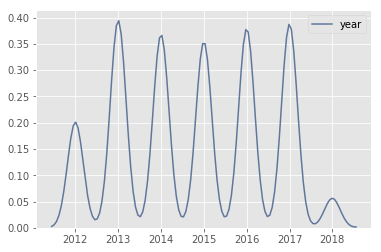

In [8]:
sns.kdeplot(dfPed['year'])

Pedestrian incidents by Month

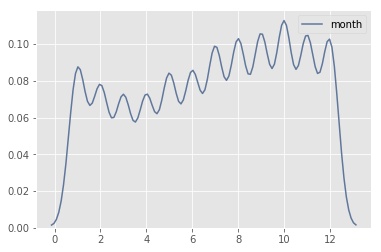

In [9]:
sns.kdeplot(dfPed['month'])

Pedestrian incidents - Day of Week

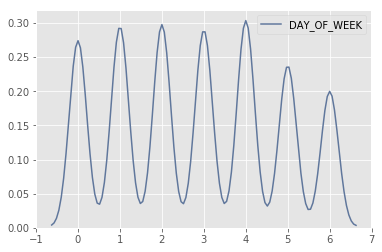

In [10]:
sns.kdeplot(dfPed['DAY_OF_WEEK'])

Friday has more incidents

Which Hour?

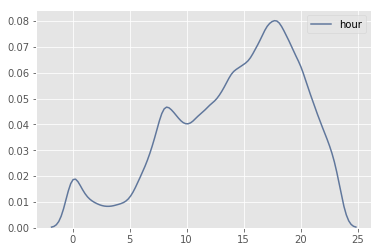

In [16]:
dfPed['TIME'] = pd.to_datetime(dfPed['TIME'])
dfPed['hour'] =dfPed['TIME'].dt.hour
sns.kdeplot(dfPed['hour'])

Where ?

## Vizion Zero 

### Arterial slow zones

Load Slow zone data

In [3]:
#Load slow zone data
import json
from urllib.request import urlopen
import requests
from shapely.geometry import shape, Point

In [25]:
slowzones = 'http://www.nyc.gov/html/dot/downloads/misc/arterial_slow_zones.json'


In [4]:
def loadGeoJson(url):
    response = urlopen(url)
    js = json.loads(response.read())
    return js

In [5]:
def existsInGeoJson(js, longitude, latitude, threshold):
    point = Point(longitude, latitude)
    # check each polygon to see if it contains the point
    found = False
    for feature in js['features']:
        polygon = shape(feature['geometry'])
        if polygon.distance(point) < threshold:
            #print ('Found containing polygon:', feature)
            found = True
            break
    return found

In [6]:
#If long, lat falls near the shape, then its in slowzone region.

def pointExists(row, threshold, jsondata):
    retvalue = 0
    if(existsInGeoJson(jsondata, row['LONGITUDE'], row['LATITUDE'], threshold)):
        retvalue = 1
    else:
        retvalue = 0
    return retvalue

In [35]:
slowzonesJs = loadGeoJson(slowzones)

In [7]:
#Define some error threshold (if a point is less than this threshold, then consider it)
#0.0001
threshold = 1e-4

In [36]:
#Test
print(existsInGeoJson(slowzonesJs, -73.9, 40.723, threshold))

False


Determine & Add SLOWZONE for all rows

In [38]:
dfPed['SLOWZONE']=0

In [44]:
dfPed['SLOWZONE'] = dfPed.apply(pointExists, axis=1, threshold = threshold, jsondata=slowzonesJs )

In [46]:
#How many matched
len(dfPed[dfPed['SLOWZONE'] == 1])

10500

In [9]:
import pickle

In [10]:
dfPed.to_pickle('pedestrians.pkl')

Analyse the data pre and post 2014, where SLOWZONE=1 and see.
Also explore the data where SLOWZONE is 0 Vs 1.

In [90]:
#Read the data frame from pickle. Useful when you re-open this session and wanted to directly run this section.
dfpickle = pd.read_pickle('pedestrians.pkl')

In [91]:
dfpickle.head()

,Unnamed: 0,DATE,TIME,BOROUGH,ZIP.CODE,LATITUDE,LONGITUDE,LOCATION,ON.STREET.NAME,CROSS.STREET.NAME,...,VEHICLE.TYPE.CODE.2,VEHICLE.TYPE.CODE.3,VEHICLE.TYPE.CODE.4,VEHICLE.TYPE.CODE.5,DATENew,year,month,DAY_OF_WEEK,hour,SLOWZONE
0,16,02/27/2018,2018-03-24 10:13:00,BROOKLYN,11226.0,40.642690,-73.95764,"(40.64269, -73.95764)",CLARENDON ROAD,FLATBUSH AVENUE,...,NaN,NaN,NaN,NaN,2018-02-27,2018,2,1,10,1
1,42,02/27/2018,2018-03-24 10:56:00,NaN,NaN,40.847500,-73.86696,"(40.8475, -73.86696)",RHINELANDER AVENUE,WHITE PLAINS ROAD,...,NaN,NaN,NaN,NaN,2018-02-27,2018,2,1,10,0
2,50,02/27/2018,2018-03-24 11:08:00,QUEENS,11432.0,40.705200,-73.79926,"(40.7052, -73.79926)",NaN,NaN,...,NaN,NaN,NaN,NaN,2018-02-27,2018,2,1,11,0
3,57,02/27/2018,2018-03-24 11:30:00,BROOKLYN,11201.0,40.695232,-73.98326,"(40.695232, -73.98326)",NaN,NaN,...,BICYCLE,NaN,NaN,NaN,2018-02-27,2018,2,1,11,0
4,71,02/27/2018,2018-03-24 12:03:00,BROOKLYN,11236.0,40.645027,-73.91998,"(40.645027, -73.91998)",CLARENDON ROAD,RALPH AVENUE,...,BICYCLE,NaN,NaN,NaN,2018-02-27,2018,2,1,12,0


Review pedestrian accidents ONLY in the SLOWZONE area , during these years

In [92]:
#gather all ped incidents in slow zone.
dfslowzone = dfpickle[dfpickle['SLOWZONE'] == 1]

In [93]:
dfslowzone.size

378000

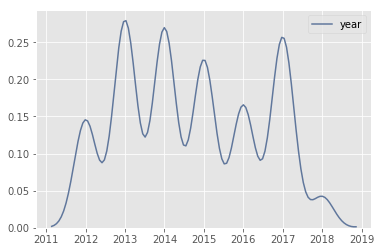

In [94]:
sns.kdeplot(dfslowzone['year'])

We could see a clear reduction starting 2014 thru 2016, but again increase during 2017.

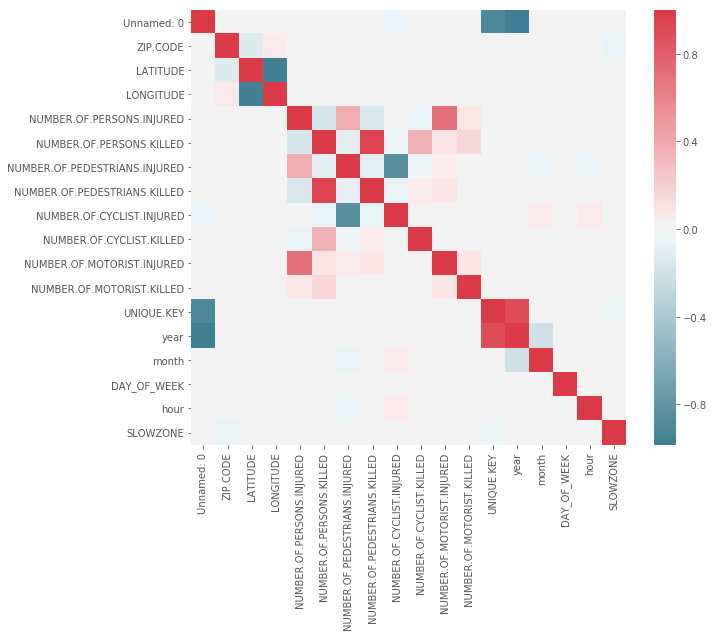

In [66]:
import numpy as np
f, ax = plt.subplots(figsize=(10, 8))
corr = dfpickle.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [95]:
dfpickle['TOTAL_INJURED'] = dfpickle['NUMBER.OF.PERSONS.INJURED'] + dfpickle['NUMBER.OF.PEDESTRIANS.INJURED'] + dfpickle['NUMBER.OF.CYCLIST.INJURED'] + dfpickle['NUMBER.OF.MOTORIST.INJURED']
dfpickle['TOTAL_KILLED'] = dfpickle['NUMBER.OF.PERSONS.KILLED'] + dfpickle['NUMBER.OF.PEDESTRIANS.KILLED'] + dfpickle['NUMBER.OF.CYCLIST.KILLED'] + dfpickle['NUMBER.OF.MOTORIST.KILLED']

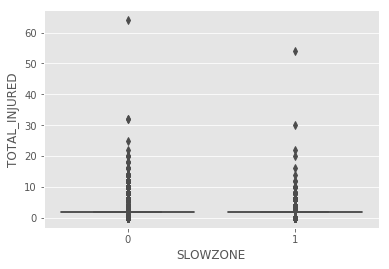

In [96]:
sns.boxplot(dfpickle['SLOWZONE'], dfpickle['TOTAL_INJURED'])

In [99]:
dfslowbyborough = dfpickle.groupby(['BOROUGH','SLOWZONE'], as_index=False)['TOTAL_INJURED'].sum()
dfslowbyborough

,BOROUGH,SLOWZONE,TOTAL_INJURED
0,BRONX,0,17560
1,BRONX,1,3085
2,BROOKLYN,0,47846
3,BROOKLYN,1,5423
4,MANHATTAN,0,32815
5,MANHATTAN,1,6735
6,QUEENS,0,28127
7,QUEENS,1,4869
8,STATEN ISLAND,0,3072
9,STATEN ISLAND,1,447


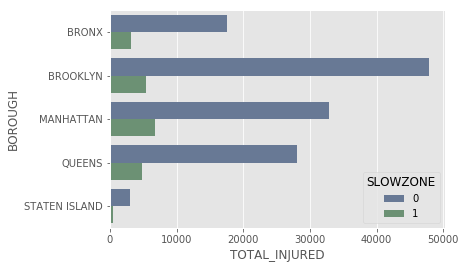

In [101]:
sns.barplot(x='TOTAL_INJURED', y='BOROUGH', hue="SLOWZONE", data=dfslowbyborough)

In [102]:
dfslowbyboroughkilled = dfpickle.groupby(['BOROUGH','SLOWZONE'], as_index=False)['TOTAL_KILLED'].sum()
dfslowbyboroughkilled

,BOROUGH,SLOWZONE,TOTAL_KILLED
0,BRONX,0,132
1,BRONX,1,42
2,BROOKLYN,0,363
3,BROOKLYN,1,60
4,MANHATTAN,0,266
5,MANHATTAN,1,54
6,QUEENS,0,296
7,QUEENS,1,76
8,STATEN ISLAND,0,46
9,STATEN ISLAND,1,4


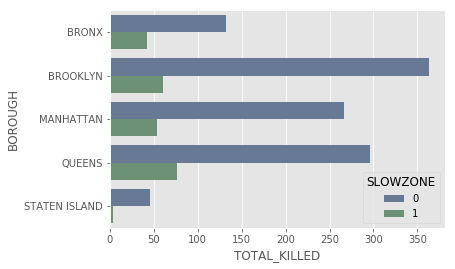

In [103]:
sns.barplot(x='TOTAL_KILLED', y='BOROUGH', hue="SLOWZONE", data=dfslowbyboroughkilled)

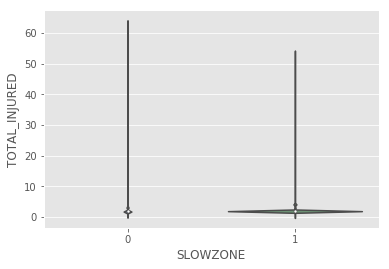

In [79]:
sns.violinplot(dfpickle['SLOWZONE'], dfpickle['TOTAL_INJURED'])

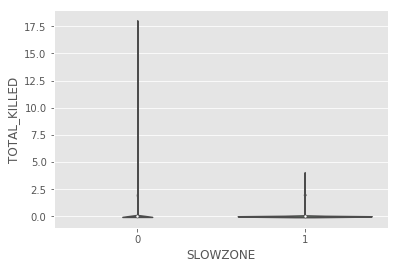

In [80]:
sns.violinplot(dfpickle['SLOWZONE'], dfpickle['TOTAL_KILLED'])

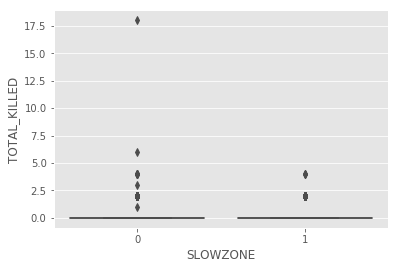

In [81]:
df
sns.boxplot(dfpickle['SLOWZONE'], dfpickle['TOTAL_KILLED'])

## Speed Humps

Speed Humps are a raised area of a roadway designed to reduce vehicle speeds. Dates reflect the
first time a speed hump was installed at a location, subsequent removals and/or re-installations
are not included. 

In [18]:
#Read the latest dataframe from pickle
dfpickle = pd.read_pickle('pedestrians.pkl')
dfpickle.head()

,Unnamed: 0,DATE,TIME,BOROUGH,ZIP.CODE,LATITUDE,LONGITUDE,LOCATION,ON.STREET.NAME,CROSS.STREET.NAME,...,VEHICLE.TYPE.CODE.2,VEHICLE.TYPE.CODE.3,VEHICLE.TYPE.CODE.4,VEHICLE.TYPE.CODE.5,DATENew,year,month,DAY_OF_WEEK,hour,SLOWZONE
0,16,02/27/2018,2018-03-24 10:13:00,BROOKLYN,11226.0,40.642690,-73.95764,"(40.64269, -73.95764)",CLARENDON ROAD,FLATBUSH AVENUE,...,NaN,NaN,NaN,NaN,2018-02-27,2018,2,1,10,1
1,42,02/27/2018,2018-03-24 10:56:00,NaN,NaN,40.847500,-73.86696,"(40.8475, -73.86696)",RHINELANDER AVENUE,WHITE PLAINS ROAD,...,NaN,NaN,NaN,NaN,2018-02-27,2018,2,1,10,0
2,50,02/27/2018,2018-03-24 11:08:00,QUEENS,11432.0,40.705200,-73.79926,"(40.7052, -73.79926)",NaN,NaN,...,NaN,NaN,NaN,NaN,2018-02-27,2018,2,1,11,0
3,57,02/27/2018,2018-03-24 11:30:00,BROOKLYN,11201.0,40.695232,-73.98326,"(40.695232, -73.98326)",NaN,NaN,...,BICYCLE,NaN,NaN,NaN,2018-02-27,2018,2,1,11,0
4,71,02/27/2018,2018-03-24 12:03:00,BROOKLYN,11236.0,40.645027,-73.91998,"(40.645027, -73.91998)",CLARENDON ROAD,RALPH AVENUE,...,BICYCLE,NaN,NaN,NaN,2018-02-27,2018,2,1,12,0


In [26]:
#load the geojson
speedhumps = 'http://www.nyc.gov/html/dot/downloads/misc/speed_humps.json'
speedhumpsjs = loadGeoJson(speedhumps)

In [34]:
#Test with smaller dataset
count = 0
for i in range(1,1200):
    if existsInGeoJson(speedhumpsjs, dfpickle.iloc[i]['LONGITUDE'], dfpickle.iloc[i]['LATITUDE'], threshold):
        count = count + 1
print(count)

128


In [40]:
#Create a new feature called SPEED_BUMP, 1 indicates its near speed bump, 0 indicates not.
dfpickle['SPEED_BUMP'] = dfpickle.apply(pointExists, axis=1, threshold = threshold, jsondata=speedhumpsjs)

In [41]:
#How many matched
len(dfpickle[dfpickle['SPEED_BUMP'] == 1])

9657

In [42]:
dfpickle.to_pickle('pedestrians_speedhumps.pkl')

In [3]:
dfpickle = pd.read_pickle('pedestrians_speedhumps.pkl')

In [4]:
dfpickle['TOTAL_INJURED'] = dfpickle['NUMBER.OF.PERSONS.INJURED'] + dfpickle['NUMBER.OF.PEDESTRIANS.INJURED'] + dfpickle['NUMBER.OF.CYCLIST.INJURED'] + dfpickle['NUMBER.OF.MOTORIST.INJURED']
dfpickle['TOTAL_KILLED'] = dfpickle['NUMBER.OF.PERSONS.KILLED'] + dfpickle['NUMBER.OF.PEDESTRIANS.KILLED'] + dfpickle['NUMBER.OF.CYCLIST.KILLED'] + dfpickle['NUMBER.OF.MOTORIST.KILLED']

In [5]:
dfpickle.head()

,Unnamed: 0,DATE,TIME,BOROUGH,ZIP.CODE,LATITUDE,LONGITUDE,LOCATION,ON.STREET.NAME,CROSS.STREET.NAME,...,VEHICLE.TYPE.CODE.5,DATENew,year,month,DAY_OF_WEEK,hour,SLOWZONE,SPEED_BUMP,TOTAL_INJURED,TOTAL_KILLED
0,16,02/27/2018,2018-03-24 10:13:00,BROOKLYN,11226.0,40.642690,-73.95764,"(40.64269, -73.95764)",CLARENDON ROAD,FLATBUSH AVENUE,...,NaN,2018-02-27,2018,2,1,10,1,0,2,0
1,42,02/27/2018,2018-03-24 10:56:00,NaN,NaN,40.847500,-73.86696,"(40.8475, -73.86696)",RHINELANDER AVENUE,WHITE PLAINS ROAD,...,NaN,2018-02-27,2018,2,1,10,0,0,2,0
2,50,02/27/2018,2018-03-24 11:08:00,QUEENS,11432.0,40.705200,-73.79926,"(40.7052, -73.79926)",NaN,NaN,...,NaN,2018-02-27,2018,2,1,11,0,1,2,0
3,57,02/27/2018,2018-03-24 11:30:00,BROOKLYN,11201.0,40.695232,-73.98326,"(40.695232, -73.98326)",NaN,NaN,...,NaN,2018-02-27,2018,2,1,11,0,0,2,0
4,71,02/27/2018,2018-03-24 12:03:00,BROOKLYN,11236.0,40.645027,-73.91998,"(40.645027, -73.91998)",CLARENDON ROAD,RALPH AVENUE,...,NaN,2018-02-27,2018,2,1,12,0,0,2,0


20335
158783


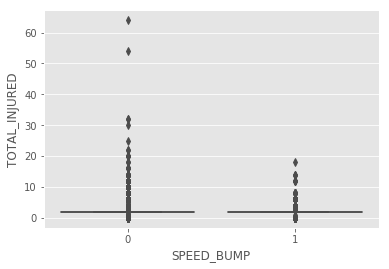

In [40]:
print(dfpickle.loc[dfpickle['SPEED_BUMP'] == 1, 'TOTAL_INJURED'].sum())
print(dfpickle.loc[dfpickle['SPEED_BUMP'] == 0, 'TOTAL_INJURED'].sum())
sns.boxplot(dfpickle['SPEED_BUMP'], dfpickle['TOTAL_INJURED'], dodge=False)


146
1682


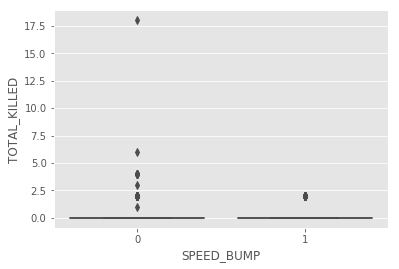

In [41]:
print(dfpickle.loc[dfpickle['SPEED_BUMP'] == 1, 'TOTAL_KILLED'].sum())
print(dfpickle.loc[dfpickle['SPEED_BUMP'] == 0, 'TOTAL_KILLED'].sum())
sns.boxplot(dfpickle['SPEED_BUMP'], dfpickle['TOTAL_KILLED'])

In [83]:
dfszbyborough = dfpickle.groupby(['BOROUGH','SPEED_BUMP'], as_index=False)['TOTAL_INJURED'].sum()
dfszbyborough


,BOROUGH,SPEED_BUMP,TOTAL_INJURED
0,BRONX,0,16253
1,BRONX,1,4392
2,BROOKLYN,0,46010
3,BROOKLYN,1,7259
4,MANHATTAN,0,36206
5,MANHATTAN,1,3344
6,QUEENS,0,29032
7,QUEENS,1,3964
8,STATEN ISLAND,0,3230
9,STATEN ISLAND,1,289


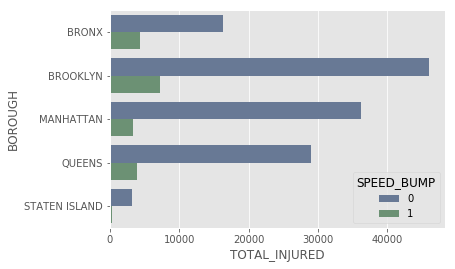

In [84]:
sns.barplot(x='TOTAL_INJURED', y='BOROUGH', hue="SPEED_BUMP", data=dfszbyborough)

In [85]:
dfszbyboroughkilled = dfpickle.groupby(['BOROUGH','SPEED_BUMP'], as_index=False)['TOTAL_KILLED'].sum()
dfszbyboroughkilled

,BOROUGH,SPEED_BUMP,TOTAL_KILLED
0,BRONX,0,150
1,BRONX,1,24
2,BROOKLYN,0,363
3,BROOKLYN,1,60
4,MANHATTAN,0,302
5,MANHATTAN,1,18
6,QUEENS,0,344
7,QUEENS,1,28
8,STATEN ISLAND,0,46
9,STATEN ISLAND,1,4


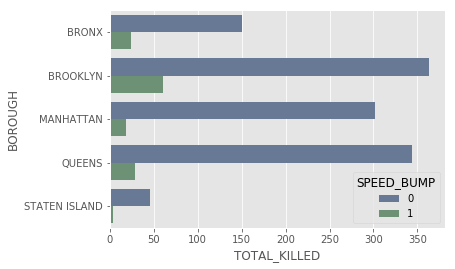

In [86]:
sns.barplot(x='TOTAL_KILLED', y='BOROUGH', hue="SPEED_BUMP", data=dfszbyboroughkilled)

In [87]:
#gather all ped incidents in SPEED_BUMP zone.
dfspeedbumpzone = dfpickle[dfpickle['SPEED_BUMP'] == 1]

In [88]:
dfspeedbumpzone.head()

,Unnamed: 0,DATE,TIME,BOROUGH,ZIP.CODE,LATITUDE,LONGITUDE,LOCATION,ON.STREET.NAME,CROSS.STREET.NAME,...,VEHICLE.TYPE.CODE.5,DATENew,year,month,DAY_OF_WEEK,hour,SLOWZONE,SPEED_BUMP,TOTAL_INJURED,TOTAL_KILLED
2,50,02/27/2018,2018-03-24 11:08:00,QUEENS,11432.0,40.705200,-73.79926,"(40.7052, -73.79926)",NaN,NaN,...,NaN,2018-02-27,2018,2,1,11,0,1,2,0
5,94,02/27/2018,2018-03-24 12:53:00,BRONX,10452.0,40.835110,-73.91945,"(40.83511, -73.91945)",WALTON AVENUE,EAST 167 STREET,...,NaN,2018-02-27,2018,2,1,12,0,1,2,0
14,246,02/27/2018,2018-03-24 16:40:00,BRONX,10457.0,40.855362,-73.89878,"(40.855362, -73.89878)",VALENTINE AVENUE,EAST 182 STREET,...,NaN,2018-02-27,2018,2,1,16,0,1,2,0
22,329,02/27/2018,2018-03-24 18:59:00,NaN,NaN,40.829052,-73.85038,"(40.829052, -73.85038)",CASTLE HILL AVENUE,NaN,...,NaN,2018-02-27,2018,2,1,18,0,1,2,0
24,356,02/27/2018,2018-03-24 20:12:00,BRONX,10472.0,40.832650,-73.86366,"(40.83265, -73.86366)",WESTCHESTER AVENUE,LELAND AVENUE,...,NaN,2018-02-27,2018,2,1,20,0,1,2,0


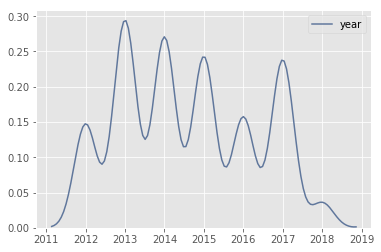

In [89]:
sns.kdeplot(dfspeedbumpzone['year'])

In [50]:
#Clear reduction in 2016, however we see a slight increase again in 2017

In [ ]:
#Potentially we may be able to find the hot spots in the areas where there are no speed bumps ? research.

In [66]:
#KDE (Kernal density estimate)

## SIGNAL TIMING 25MPH 

In [8]:
#Get the latest existing file
dfpickle = pd.read_pickle('pedestrians_speedhumps.pkl')

#load geo json for signal timing
signaltiming = "http://www.nyc.gov/html/dot/downloads/misc/signal_timing.json"
signaltimingjs = loadGeoJson(signaltiming)

#Create a new feature called SIGNAL_TIMING, 1 indicates SIGNAL_TIMING, , 0 indicates not.
threshold = 1e-4
dfpickle['SIGNAL_TIMING'] = dfpickle.apply(pointExists, axis=1, threshold = threshold, jsondata=signaltimingjs)

len(dfpickle[dfpickle['SIGNAL_TIMING'] == 1])

# WARNING WARNING : store it on disk, so that you do NOT have to run again for couple of hours !!!
dfpickle.to_pickle('pedestrians_sz_sh_sigtim.pkl')

In [9]:
dfpickle.head()

,Unnamed: 0,DATE,TIME,BOROUGH,ZIP.CODE,LATITUDE,LONGITUDE,LOCATION,ON.STREET.NAME,CROSS.STREET.NAME,...,VEHICLE.TYPE.CODE.4,VEHICLE.TYPE.CODE.5,DATENew,year,month,DAY_OF_WEEK,hour,SLOWZONE,SPEED_BUMP,SIGNAL_TIMING
0,16,02/27/2018,2018-03-24 10:13:00,BROOKLYN,11226.0,40.642690,-73.95764,"(40.64269, -73.95764)",CLARENDON ROAD,FLATBUSH AVENUE,...,NaN,NaN,2018-02-27,2018,2,1,10,1,0,1
1,42,02/27/2018,2018-03-24 10:56:00,NaN,NaN,40.847500,-73.86696,"(40.8475, -73.86696)",RHINELANDER AVENUE,WHITE PLAINS ROAD,...,NaN,NaN,2018-02-27,2018,2,1,10,0,0,1
2,50,02/27/2018,2018-03-24 11:08:00,QUEENS,11432.0,40.705200,-73.79926,"(40.7052, -73.79926)",NaN,NaN,...,NaN,NaN,2018-02-27,2018,2,1,11,0,1,0
3,57,02/27/2018,2018-03-24 11:30:00,BROOKLYN,11201.0,40.695232,-73.98326,"(40.695232, -73.98326)",NaN,NaN,...,NaN,NaN,2018-02-27,2018,2,1,11,0,0,0
4,71,02/27/2018,2018-03-24 12:03:00,BROOKLYN,11236.0,40.645027,-73.91998,"(40.645027, -73.91998)",CLARENDON ROAD,RALPH AVENUE,...,NaN,NaN,2018-02-27,2018,2,1,12,0,0,1


In [10]:
dfpickle.shape

(85037, 38)

## BIKE PRIORITY DATA

In [11]:
    
    #Get the latest existing file
dfpickle = pd.read_pickle('pedestrians_sz_sh_sigtim.pkl')

#load geo json for BIKE PRIORITY
bikepriority = "http://www.nyc.gov/html/dot/downloads/misc/bike_priority_districts.json"
bikepriorityjs = loadGeoJson(bikepriority)

#Create a new feature called BIKE_PRIORITY, 1 indicates BIKE_PRIORITY, , 0 indicates not.
threshold = 1e-4
dfpickle['BIKE_PRIORITY'] = dfpickle.apply(pointExists, axis=1, threshold = threshold, jsondata=bikepriorityjs)

len(dfpickle[dfpickle['BIKE_PRIORITY'] == 1])

# WARNING WARNING : store it on disk, so that you do NOT have to run again for couple of hours !!!
dfpickle.to_pickle('pedestrians_sz_sh_sigtim_bp.pkl')

In [12]:
dfpickle.shape

(85037, 39)

## ENHANCED CROSSING

In [13]:
   
dfpickle = pd.read_pickle('pedestrians_sz_sh_sigtim_bp.pkl')

#load geo json for ec
enhancedcrossing = "http://www.nyc.gov/html/dot/downloads/misc/enhanced_crossings.json"
enhancedcrossingjs = loadGeoJson(enhancedcrossing)

#Create a new feature called ENHANCED_CROSSING, 1 indicates ENHANCED_CROSSING, , 0 indicates not.
threshold = 1e-4
dfpickle['ENHANCED_CROSSING'] = dfpickle.apply(pointExists, axis=1, threshold = threshold, jsondata=enhancedcrossingjs)

len(dfpickle[dfpickle['ENHANCED_CROSSING'] == 1])

# WARNING WARNING : store it on disk, so that you do NOT have to run again for couple of hours !!!
dfpickle.to_pickle('pedestrians_sz_sh_sigtim_bp_ec.pkl')

In [14]:
dfpickle.shape

(85037, 40)

In [15]:
len(dfpickle[dfpickle['ENHANCED_CROSSING'] == 1])

87

## LEADING PEDESTRIAN INTERVAL SIGNALS

In [16]:
   
dfpickle = pd.read_pickle('pedestrians_sz_sh_sigtim_bp_ec.pkl')

#load geo json for LPIS
lpisjsjs = loadGeoJson("http://www.nyc.gov/html/dot/downloads/misc/leading_pedestrian_interval_signals.json")

#Create a new feature called LEADING_PEDESTRIAN_INTERVAL, 1 indicates LEADING_PEDESTRIAN_INTERVAL, , 0 indicates not.
threshold = 1e-4
dfpickle['LEADING_PEDESTRIAN_INTERVAL'] = dfpickle.apply(pointExists, axis=1, threshold = threshold, jsondata=lpisjsjs)

len(dfpickle[dfpickle['LEADING_PEDESTRIAN_INTERVAL'] == 1])

# WARNING WARNING : store it on disk, so that you do NOT have to run again for couple of hours !!!
dfpickle.to_pickle('pedestrians_sz_sh_sigtim_bp_ec_lpis.pkl')

In [17]:
len(dfpickle[dfpickle['LEADING_PEDESTRIAN_INTERVAL'] == 1])

15084

In [18]:
dfpickle.shape

(85037, 41)

## LEFT TURN TRAFFIC CALMING 

In [19]:
dfpickle = pd.read_pickle('pedestrians_sz_sh_sigtim_bp_ec_lpis.pkl')

#load geo json for LPIS
lttcjs = loadGeoJson("http://www.nyc.gov/html/dot/downloads/misc/left_turn_traffic_calming.json")

#Create a new feature called LEFT_TURN_TRAFFIC_CALMING, 1 indicates LEFT_TURN_TRAFFIC_CALMING, , 0 indicates not.
threshold = 1e-4
dfpickle['LEFT_TURN_TRAFFIC_CALMING'] = dfpickle.apply(pointExists, axis=1, threshold = threshold, jsondata=lttcjs)

# WARNING : store it on disk, so that you do NOT have to run again for couple of hours !!!
dfpickle.to_pickle('pedestrians_sz_sh_sigtim_bp_ec_lpis_lttc.pkl')

len(dfpickle[dfpickle['LEFT_TURN_TRAFFIC_CALMING'] == 1])

2985

In [20]:
dfpickle.shape

(85037, 42)

## NEIGHBORHOOD SLOW ZONE 

In [21]:
dfpickle = pd.read_pickle('pedestrians_sz_sh_sigtim_bp_ec_lpis_lttc.pkl')

#load geo json for LPIS
nhszjs = loadGeoJson("http://www.nyc.gov/html/dot/downloads/misc/neighborhood_slow_zones.json")

#Create a new feature called NEIGHBORHOOD_SLOW_ZONE, 1 indicates NEIGHBORHOOD_SLOW_ZONE, , 0 indicates not.
threshold = 1e-4
dfpickle['NEIGHBORHOOD_SLOW_ZONE'] = dfpickle.apply(pointExists, axis=1, threshold = threshold, jsondata=nhszjs)

# WARNING : store it on disk, so that you do NOT have to run again for couple of hours !!!
dfpickle.to_pickle('pedestrians_sz_sh_sigtim_bp_ec_lpis_lttc_nhsz.pkl')

len(dfpickle[dfpickle['NEIGHBORHOOD_SLOW_ZONE'] == 1])

4905

In [22]:
dfpickle.shape

(85037, 43)

## Safe Streets For Seniors 

In [23]:
dfpickle = pd.read_pickle('pedestrians_sz_sh_sigtim_bp_ec_lpis_lttc_nhsz.pkl')

#load geo json for LPIS
ssfsjs = loadGeoJson("http://www.nyc.gov/html/dot/downloads/misc/safe_streets_for_seniors.json")

#Create a new feature called SAFE_STREETS_FOR_SENIORS, 1 indicates SAFE_STREETS_FOR_SENIORS, , 0 indicates not.
threshold = 1e-4
dfpickle['SAFE_STREETS_FOR_SENIORS'] = dfpickle.apply(pointExists, axis=1, threshold = threshold, jsondata=ssfsjs)

# WARNING : store it on disk, so that you do NOT have to run again for couple of hours !!!
dfpickle.to_pickle('pedestrians_sz_sh_sigtim_bp_ec_lpis_lttc_nhsz_ssfs.pkl')

len(dfpickle[dfpickle['SAFE_STREETS_FOR_SENIORS'] == 1])

21742

In [24]:
dfpickle.shape

(85037, 44)

## Street Improvement Projects - INTERSECTIONS

In [29]:
dfpickle = pd.read_pickle('pedestrians_sz_sh_sigtim_bp_ec_lpis_lttc_nhsz_ssfs.pkl')

sipijs = loadGeoJson("http://www.nyc.gov/html/dot/downloads/misc/street_improvement_projects_intersections.json")

#Create a new feature called SIP_INTERSECTIONS, 1 indicates SIP_INTERSECTIONS, , 0 indicates not.
threshold = 1e-4
dfpickle['SIP_INTERSECTIONS'] = dfpickle.apply(pointExists, axis=1, threshold = threshold, jsondata=sipijs)

# WARNING : store it on disk, so that you do NOT have to run again for couple of hours !!!
dfpickle.to_pickle('pedestrians_sz_sh_sigtim_bp_ec_lpis_lttc_nhsz_ssfs_sipi.pkl')

len(dfpickle[dfpickle['SIP_INTERSECTIONS'] == 1])

2353

In [30]:
dfpickle.shape

(85037, 45)

## Street Improvement Projects - CORRIDORS

In [31]:
#http://www.nyc.gov/html/dot/downloads/misc/street_improvement_projects_corridors.json

dfpickle = pd.read_pickle('pedestrians_sz_sh_sigtim_bp_ec_lpis_lttc_nhsz_ssfs_sipi.pkl')

sipcjs = loadGeoJson("http://www.nyc.gov/html/dot/downloads/misc/street_improvement_projects_corridors.json")

#Create a new feature called SIP_CORRIDORS, 1 indicates SIP_CORRIDORS, , 0 indicates not.
threshold = 1e-4
dfpickle['SIP_CORRIDORS'] = dfpickle.apply(pointExists, axis=1, threshold = threshold, jsondata=sipcjs)

# WARNING : store it on disk, so that you do NOT have to run again for couple of hours !!!
dfpickle.to_pickle('pedestrians_sz_sh_sigtim_bp_ec_lpis_lttc_nhsz_ssfs_sipi_sipc.pkl')

len(dfpickle[dfpickle['SIP_CORRIDORS'] == 1])

26025

In [32]:
dfpickle.shape

(85037, 46)

## VZ Priority Corridors

In [33]:

dfpickle = pd.read_pickle('pedestrians_sz_sh_sigtim_bp_ec_lpis_lttc_nhsz_ssfs_sipi_sipc.pkl')

vzpcjs = loadGeoJson("http://www.nyc.gov/html/dot/downloads/misc/vz_priority_corridors.json")

#Create a new feature called PRIORITY_CORRIDORS, 1 indicates PRIORITY_CORRIDORS, , 0 indicates not.
threshold = 1e-4
dfpickle['PRIORITY_CORRIDORS'] = dfpickle.apply(pointExists, axis=1, threshold = threshold, jsondata=vzpcjs)

# WARNING : store it on disk, so that you do NOT have to run again for couple of hours !!!
dfpickle.to_pickle('pedestrians_sz_sh_sigtim_bp_ec_lpis_lttc_nhsz_ssfs_sipi_sipc_vzpc.pkl')

len(dfpickle[dfpickle['PRIORITY_CORRIDORS'] == 1])


31991

In [34]:
dfpickle.shape

(85037, 47)

## VZ Priority Intersections 

In [35]:
dfpickle = pd.read_pickle('pedestrians_sz_sh_sigtim_bp_ec_lpis_lttc_nhsz_ssfs_sipi_sipc_vzpc.pkl')

vzpijs = loadGeoJson("http://www.nyc.gov/html/dot/downloads/misc/vz_priority_intersections.json")

#Create a new feature called PRIORITY_INTERSECTIONS, 1 indicates PRIORITY_INTERSECTIONS, , 0 indicates not.
threshold = 1e-4
dfpickle['PRIORITY_INTERSECTIONS'] = dfpickle.apply(pointExists, axis=1, threshold = threshold, jsondata=vzpijs)

# WARNING : store it on disk, so that you do NOT have to run again for couple of hours !!!
dfpickle.to_pickle('pedestrians_sz_sh_sigtim_bp_ec_lpis_lttc_nhsz_ssfs_sipi_sipc_vzpc_vzpi.pkl')

len(dfpickle[dfpickle['PRIORITY_INTERSECTIONS'] == 1])

4358

In [36]:
dfpickle.shape

(85037, 48)

## VZ Priority Zones

In [37]:
dfpickle = pd.read_pickle('pedestrians_sz_sh_sigtim_bp_ec_lpis_lttc_nhsz_ssfs_sipi_sipc_vzpc_vzpi.pkl')

vzpzjs = loadGeoJson("http://www.nyc.gov/html/dot/downloads/misc/vz_priority_zones.json")

#Create a new feature called PRIORITY_ZONES, 1 indicates PRIORITY_ZONES, , 0 indicates not.
threshold = 1e-4
dfpickle['PRIORITY_ZONES'] = dfpickle.apply(pointExists, axis=1, threshold = threshold, jsondata=vzpzjs)

# WARNING : store it on disk, so that you do NOT have to run again for couple of hours !!!
dfpickle.to_pickle('pedestrians_sz_sh_sigtim_bp_ec_lpis_lttc_nhsz_ssfs_sipi_sipc_vzpc_vzpi_vzpz.pkl')

len(dfpickle[dfpickle['PRIORITY_ZONES'] == 1])

36777

In [38]:
dfpickle.shape

(85037, 49)

# FULL DATA 

In [40]:
df_full_data = pd.read_pickle('pedestrians_sz_sh_sigtim_bp_ec_lpis_lttc_nhsz_ssfs_sipi_sipc_vzpc_vzpi_vzpz.pkl')

In [41]:
df_full_data.head()

,Unnamed: 0,DATE,TIME,BOROUGH,ZIP.CODE,LATITUDE,LONGITUDE,LOCATION,ON.STREET.NAME,CROSS.STREET.NAME,...,ENHANCED_CROSSING,LEADING_PEDESTRIAN_INTERVAL,LEFT_TURN_TRAFFIC_CALMING,NEIGHBORHOOD_SLOW_ZONE,SAFE_STREETS_FOR_SENIORS,SIP_INTERSECTIONS,SIP_CORRIDORS,PRIORITY_CORRIDORS,PRIORITY_INTERSECTIONS,PRIORITY_ZONES
0,16,02/27/2018,2018-03-24 10:13:00,BROOKLYN,11226.0,40.642690,-73.95764,"(40.64269, -73.95764)",CLARENDON ROAD,FLATBUSH AVENUE,...,0,0,0,0,1,0,0,1,0,1
1,42,02/27/2018,2018-03-24 10:56:00,NaN,NaN,40.847500,-73.86696,"(40.8475, -73.86696)",RHINELANDER AVENUE,WHITE PLAINS ROAD,...,0,0,0,0,0,0,1,1,0,0
2,50,02/27/2018,2018-03-24 11:08:00,QUEENS,11432.0,40.705200,-73.79926,"(40.7052, -73.79926)",NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
3,57,02/27/2018,2018-03-24 11:30:00,BROOKLYN,11201.0,40.695232,-73.98326,"(40.695232, -73.98326)",NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
4,71,02/27/2018,2018-03-24 12:03:00,BROOKLYN,11236.0,40.645027,-73.91998,"(40.645027, -73.91998)",CLARENDON ROAD,RALPH AVENUE,...,0,0,0,0,1,1,1,1,0,0


In [42]:
df_full_data.columns

Index(['Unnamed: 0', 'DATE', 'TIME', 'BOROUGH', 'ZIP.CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON.STREET.NAME', 'CROSS.STREET.NAME',
       'OFF.STREET.NAME', 'NUMBER.OF.PERSONS.INJURED',
       'NUMBER.OF.PERSONS.KILLED', 'NUMBER.OF.PEDESTRIANS.INJURED',
       'NUMBER.OF.PEDESTRIANS.KILLED', 'NUMBER.OF.CYCLIST.INJURED',
       'NUMBER.OF.CYCLIST.KILLED', 'NUMBER.OF.MOTORIST.INJURED',
       'NUMBER.OF.MOTORIST.KILLED', 'CONTRIBUTING.FACTOR.VEHICLE.1',
       'CONTRIBUTING.FACTOR.VEHICLE.2', 'CONTRIBUTING.FACTOR.VEHICLE.3',
       'CONTRIBUTING.FACTOR.VEHICLE.4', 'CONTRIBUTING.FACTOR.VEHICLE.5',
       'UNIQUE.KEY', 'VEHICLE.TYPE.CODE.1', 'VEHICLE.TYPE.CODE.2',
       'VEHICLE.TYPE.CODE.3', 'VEHICLE.TYPE.CODE.4', 'VEHICLE.TYPE.CODE.5',
       'DATENew', 'year', 'month', 'DAY_OF_WEEK', 'hour', 'SLOWZONE',
       'SPEED_BUMP', 'SIGNAL_TIMING', 'BIKE_PRIORITY', 'ENHANCED_CROSSING',
       'LEADING_PEDESTRIAN_INTERVAL', 'LEFT_TURN_TRAFFIC_CALMING',
       'NEIGHBORHOOD_SLOW_ZONE

In [47]:
df_full_data['NBR_VZ_INITIATIVES'] = df_full_data['SLOWZONE'] + df_full_data['SPEED_BUMP'] + df_full_data['SIGNAL_TIMING'] + df_full_data['BIKE_PRIORITY'] + df_full_data['ENHANCED_CROSSING'] + df_full_data['LEADING_PEDESTRIAN_INTERVAL'] + df_full_data['LEFT_TURN_TRAFFIC_CALMING'] + df_full_data['NEIGHBORHOOD_SLOW_ZONE'] + df_full_data['SAFE_STREETS_FOR_SENIORS'] + df_full_data['SIP_INTERSECTIONS']+ df_full_data['SIP_CORRIDORS'] + df_full_data['PRIORITY_CORRIDORS'] + df_full_data['PRIORITY_INTERSECTIONS'] + df_full_data['PRIORITY_ZONES']

In [48]:
df_full_data.head()

,Unnamed: 0,DATE,TIME,BOROUGH,ZIP.CODE,LATITUDE,LONGITUDE,LOCATION,ON.STREET.NAME,CROSS.STREET.NAME,...,LEADING_PEDESTRIAN_INTERVAL,LEFT_TURN_TRAFFIC_CALMING,NEIGHBORHOOD_SLOW_ZONE,SAFE_STREETS_FOR_SENIORS,SIP_INTERSECTIONS,SIP_CORRIDORS,PRIORITY_CORRIDORS,PRIORITY_INTERSECTIONS,PRIORITY_ZONES,NBR_VZ_INITIATIVES
0,16,02/27/2018,2018-03-24 10:13:00,BROOKLYN,11226.0,40.642690,-73.95764,"(40.64269, -73.95764)",CLARENDON ROAD,FLATBUSH AVENUE,...,0,0,0,1,0,0,1,0,1,6
1,42,02/27/2018,2018-03-24 10:56:00,NaN,NaN,40.847500,-73.86696,"(40.8475, -73.86696)",RHINELANDER AVENUE,WHITE PLAINS ROAD,...,0,0,0,0,0,1,1,0,0,3
2,50,02/27/2018,2018-03-24 11:08:00,QUEENS,11432.0,40.705200,-73.79926,"(40.7052, -73.79926)",NaN,NaN,...,0,0,0,0,0,0,0,0,1,2
3,57,02/27/2018,2018-03-24 11:30:00,BROOKLYN,11201.0,40.695232,-73.98326,"(40.695232, -73.98326)",NaN,NaN,...,0,0,0,0,0,0,0,0,1,1
4,71,02/27/2018,2018-03-24 12:03:00,BROOKLYN,11236.0,40.645027,-73.91998,"(40.645027, -73.91998)",CLARENDON ROAD,RALPH AVENUE,...,0,0,0,1,1,1,1,0,0,6


In [49]:
df_full_data.iloc[:,35:].head()

,SLOWZONE,SPEED_BUMP,SIGNAL_TIMING,BIKE_PRIORITY,ENHANCED_CROSSING,LEADING_PEDESTRIAN_INTERVAL,LEFT_TURN_TRAFFIC_CALMING,NEIGHBORHOOD_SLOW_ZONE,SAFE_STREETS_FOR_SENIORS,SIP_INTERSECTIONS,SIP_CORRIDORS,PRIORITY_CORRIDORS,PRIORITY_INTERSECTIONS,PRIORITY_ZONES,NBR_VZ_INITIATIVES
0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,6
1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,3
2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,2
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,0,0,1,1,0,0,0,0,1,1,1,1,0,0,6


In [50]:
df_full_data.to_pickle('full_pedestrian_data_with_visionzero.pkl')